# Dashboard

El proyectyo adjunto contiene un ejecutable para implementar un dashboard interactivo.

Se requiere resposnder las preguntas:

**Which site has the largest successful launches?**
    
    KSC LC-39A con 10 lanzamientos exitosos
    

**Which site has the highest launch success rate?**

    KSC LC-39A con el 76.9% de lanzamientos exitosos
    
**Which payload range(s) has the highest launch success rate?**

    2500 a 5000 kg de carga con 55% de éxito
    
**Which payload range(s) has the lowest launch success rate?**
    
    500 a 7500kg de carga con 22% de éxito

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

spacex_df_site1 = spacex_df.loc[spacex_df['Launch Site'] == 'CCAFS LC-40']
spacex_df_site2 = spacex_df.loc[spacex_df['Launch Site'] == 'CCAFS SLC-40']
spacex_df_site3 = spacex_df.loc[spacex_df['Launch Site'] == 'KSC LC-39A']
spacex_df_site4 = spacex_df.loc[spacex_df['Launch Site'] == 'VAFB SLC-4E']

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                dcc.Dropdown(id='site-dropdown',
                                options=[
                                    {'label': 'All Sites', 'value': 'ALL'},
                                    {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                    
                                ],
                                    value='ALL',
                                    placeholder="Select a Launch Site here",
                                    searchable=True
                                    ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)
                                dcc.RangeSlider(id='payload-slider',
                                    min=0, max=10000, step=2500,
                                    marks={0: '0',
                                        2500: '2500',
                                        5000: '5000',
                                        7500: '7500',
                                        10000: '10000',},
                                    value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(value):
    if value == 'ALL':
        fig = px.pie(spacex_df, values = 'class',
        names ='Launch Site', title = 'Total Success Launches by Site')
        return fig
    else:
        filtered_df = spacex_df.loc[spacex_df['Launch Site'] == value]
        filtered_df= filtered_df.groupby(['Launch Site','class']).size().reset_index(name='class count')
        fig = px.pie(filtered_df, values = 'class count',names='class', title = f'Success Rate for {value}')
        return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])
def get_scatter(entered_site, payload_range):
    low, high = payload_range
    if entered_site == 'ALL':
        mask = (spacex_df['Payload Mass (kg)'] > low) & (spacex_df['Payload Mass (kg)'] < high)
        fig = px.scatter(
        spacex_df[mask], x="Payload Mass (kg)", y="class", 
        color="Booster Version Category")
        return fig
    else:
        filtered_df = spacex_df.loc[spacex_df['Launch Site'] == entered_site]
        mask = (filtered_df['Payload Mass (kg)'] > low) & (filtered_df['Payload Mass (kg)'] < high)
        fig = px.scatter(
        filtered_df[mask], x="Payload Mass (kg)", y="class", 
        color="Booster Version Category")
        return fig     

# Run the app
if __name__ == '__main__':
    app.run_server()


## Dashboard - Output Screenshots

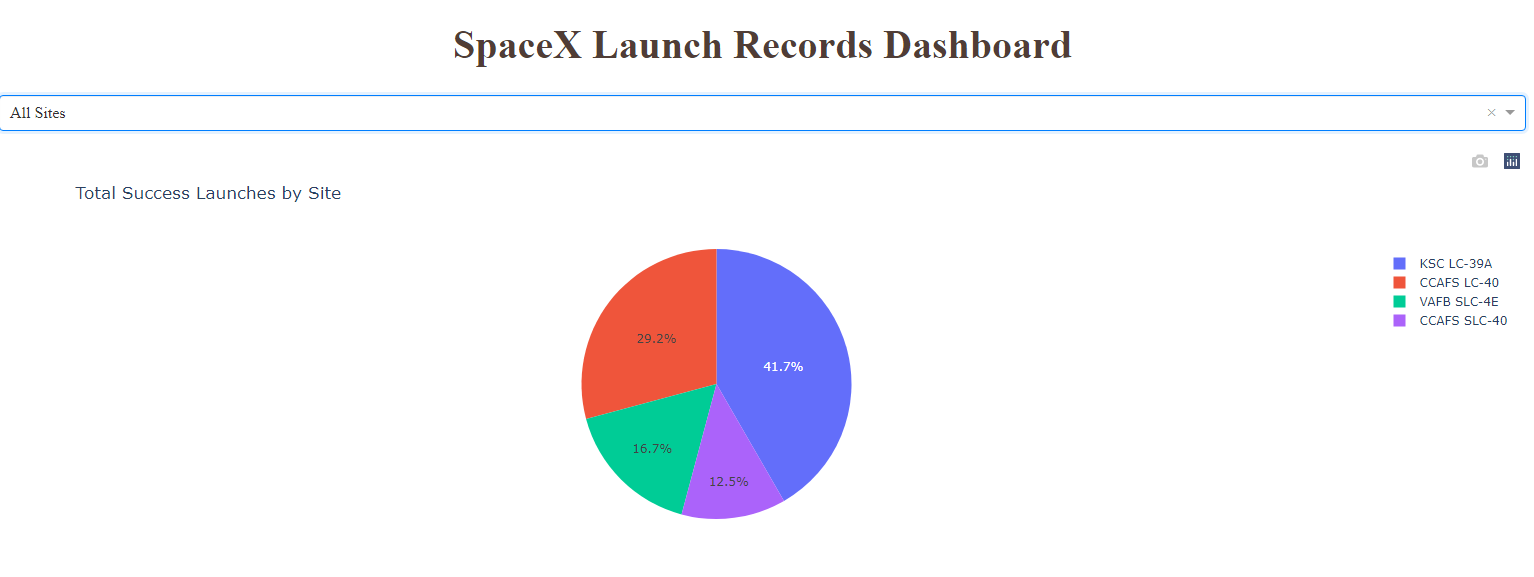

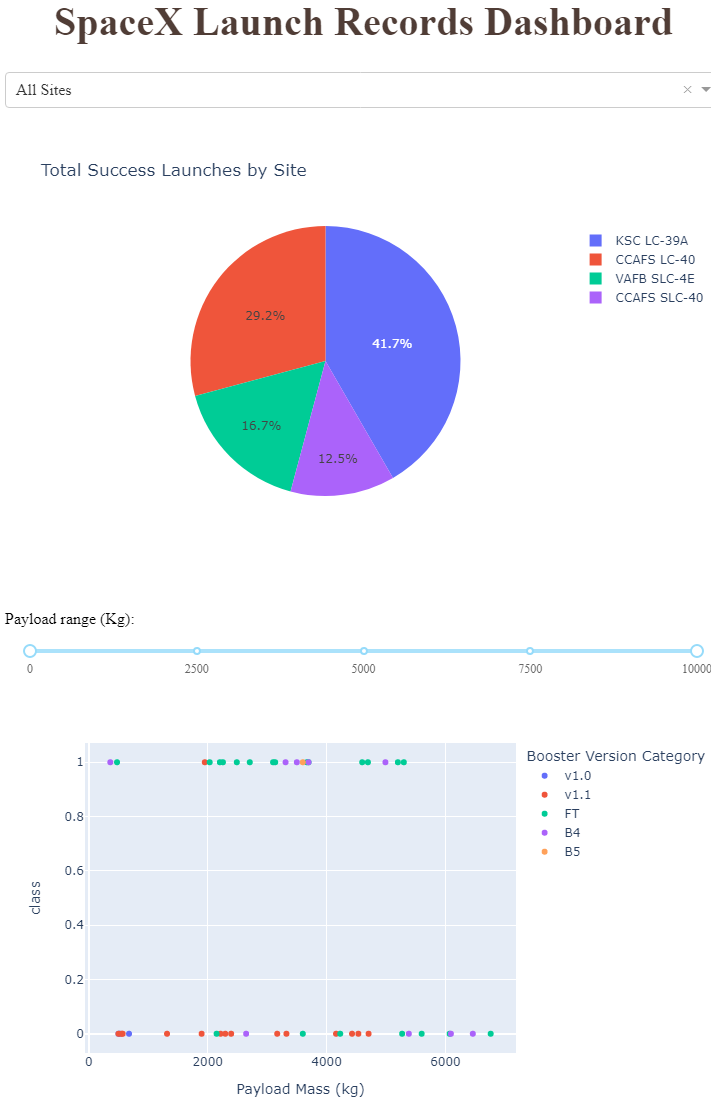

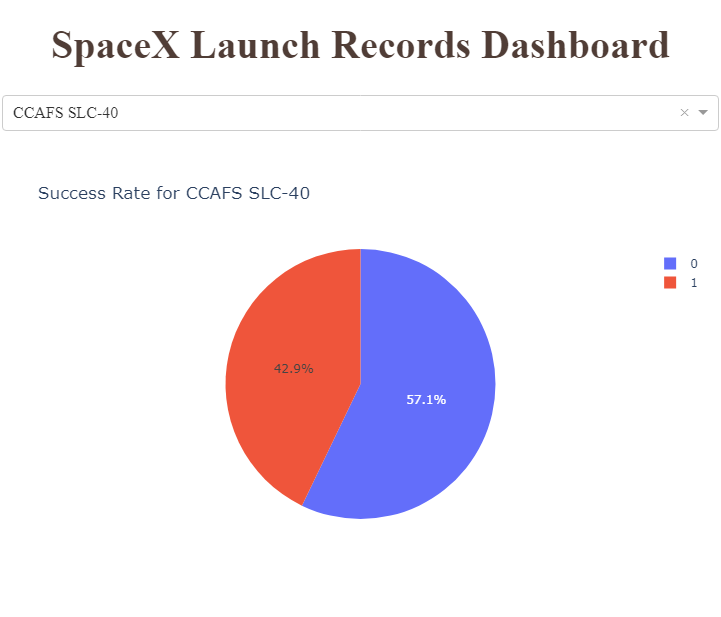

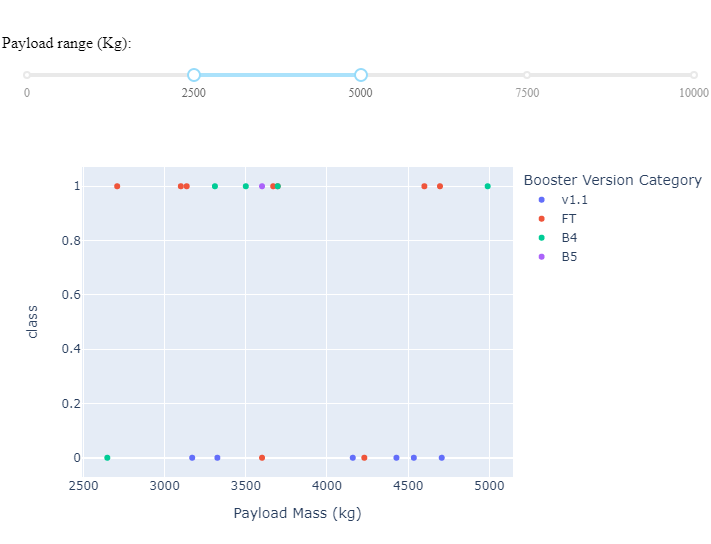